# SECTION 08, The different relationships

## Linear relationships

$$
\vec {x} = [x_0, x_1, x_2, ..., x_n] \\
f(x) = \sum_{i \in N} w_i \times x_i + b
$$

# linear_regression_course

In [1]:
'''
Linear Regression:
Use boston house price dataset.
'''
import random
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [3]:
dataset
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

In [4]:
dataframe = pd.DataFrame(data)
dataframe['price']  = target
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
dataframe.corr()

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_3706/4279439629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996,0.249929
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,0.175520,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,-0.366087,0.333461


/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_3706/3454943282.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr())


<Axes: >

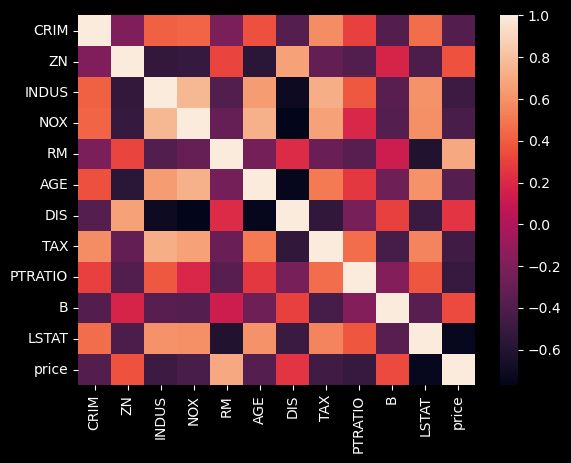

In [6]:
import seaborn as sns

sns.heatmap(dataframe.corr())

In [7]:
rm = dataframe['RM']
lstat = dataframe['LSTAT']
learning_rate = 1e-5

In [8]:
def linear(x, w, b):
    # vectorized model
    return np.dot(x, w.T) + b

In [9]:
def loss(yhat, y):
    # NumPy broadcast NumPy 广播方法
    return np.mean((yhat - y) ** 2)

In [10]:
def partial_w(x, y, yhat):
    return np.array([2 * np.mean((yhat - y) * x[0]), 2 * np.mean((yhat - y) * x[1])])

In [11]:
def partial_b(x, y, yhat):
    return 2 * np.mean((yhat - y))

In [12]:
w = np.random.random_sample(size = (1, 2))
b = np.random.random()

In [13]:
for i in range(200):
    for batch in range(len(rm)):
        # batch training
        index = random.choice(range(len(rm)))
        rm_x, lstat_x = rm[index], lstat[index]
        x = np.array([rm_x, lstat_x])
        y = target[index]

        yhat = linear(x, w, b)
        loss_ = loss(yhat, y)
        w = w + -1 * partial_w(x, y, yhat) * learning_rate
        b = b + -1 * partial_b(x, y, yhat) * learning_rate
        
        if batch % 100 == 0:
            print('Epoch: {} Batch: {}, loss: {}'.format(i, batch, loss_))

Epoch: 0 Batch: 0, loss: 80.23316285158003
Epoch: 0 Batch: 100, loss: 131.3807746438416
Epoch: 0 Batch: 200, loss: 15.536973751803707
Epoch: 0 Batch: 300, loss: 112.4838056333314
Epoch: 0 Batch: 400, loss: 445.9376791985789
Epoch: 0 Batch: 500, loss: 30.353320060893527
Epoch: 1 Batch: 0, loss: 79.23716107295775
Epoch: 1 Batch: 100, loss: 42.95924385370768
Epoch: 1 Batch: 200, loss: 101.4241922267818
Epoch: 1 Batch: 300, loss: 37.30872424359867
Epoch: 1 Batch: 400, loss: 411.5539955684909
Epoch: 1 Batch: 500, loss: 145.84151771660612
Epoch: 2 Batch: 0, loss: 795.5355624654136
Epoch: 2 Batch: 100, loss: 49.59597279857462
Epoch: 2 Batch: 200, loss: 1.03512271841187
Epoch: 2 Batch: 300, loss: 52.38848433902225
Epoch: 2 Batch: 400, loss: 187.18551996582093
Epoch: 2 Batch: 500, loss: 15.99146898036757
Epoch: 3 Batch: 0, loss: 3.4397717606145237
Epoch: 3 Batch: 100, loss: 245.41227410982538
Epoch: 3 Batch: 200, loss: 0.011246015117192969
Epoch: 3 Batch: 300, loss: 61.434992150074166
Epoch: 3 

In [14]:
def optimize(w, b, x, y, yhat, pw, pb, learning_rate):
    w = w + -1 * pw(x, y, yhat) * learning_rate
    b = b + -1 * pb(x, y, yhat) * learning_rate

    return w, b

In [15]:
def train(model_to_be_train, target, loss, pw, pb):
    w = np.random.random_sample(size = (1, 2))# w normal
    b = np.random.random() # 0 深度学习时讲解
    learning_rate = 1e-5
    epoch = 200
    losses = []
    batch_size = 10

    for i in range(epoch):
        batch_loss = []
        for batch in range(len(rm) // batch_size):
            # batch trainning
            indices = random.choice(range(len(rm)))
            # index = random.choice(range(len(rm)))
            rm_x, lstat_x = rm[indices], lstat[indices]
            x = np.array([rm_x, lstat_x])
            y = target[indices]

            yhat = model_to_be_train(x, w, b)
            loss_v = loss(yhat, y)

            batch_loss.append(loss_v)

            w, b = optimize(w, b, x, y, yhat, pw, pb, learning_rate)

            if batch % 100 == 0:
                print('Epoch: {} Batch: {}, loss: {}'.format(i, batch, loss_v))

        losses.append(np.mean(batch_loss))

    return model_to_be_train, w, b, losses

Epoch: 0 Batch: 0, loss: 74.23705297169563
Epoch: 1 Batch: 0, loss: 243.1173270339582
Epoch: 2 Batch: 0, loss: 105.47972158942082
Epoch: 3 Batch: 0, loss: 3.652936315651174
Epoch: 4 Batch: 0, loss: 81.41428416209756
Epoch: 5 Batch: 0, loss: 19.69626671287892
Epoch: 6 Batch: 0, loss: 1469.506653588619
Epoch: 7 Batch: 0, loss: 18.470727648937068
Epoch: 8 Batch: 0, loss: 6.721204747956196
Epoch: 9 Batch: 0, loss: 53.171214562304606
Epoch: 10 Batch: 0, loss: 151.98117323164524
Epoch: 11 Batch: 0, loss: 542.8436241749396
Epoch: 12 Batch: 0, loss: 27.65463654404206
Epoch: 13 Batch: 0, loss: 58.79520742627756
Epoch: 14 Batch: 0, loss: 70.18064352448336
Epoch: 15 Batch: 0, loss: 57.482089345418856
Epoch: 16 Batch: 0, loss: 50.76652309416454
Epoch: 17 Batch: 0, loss: 123.91907819855399
Epoch: 18 Batch: 0, loss: 3.1526455917910527
Epoch: 19 Batch: 0, loss: 93.77464286950081
Epoch: 20 Batch: 0, loss: 317.2902237317799
Epoch: 21 Batch: 0, loss: 284.2971688238789
Epoch: 22 Batch: 0, loss: 112.75405

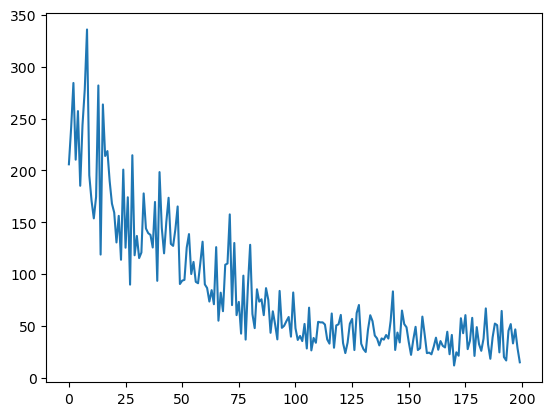

In [17]:
import matplotlib.pyplot as plt
plt.style.use('default')
import random
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']
dataframe = pd.DataFrame(data)
dataframe['price']  = target

rm = dataframe['RM']
lstat = dataframe['LSTAT']

model, w, b, losses = train(linear, target, loss, partial_w, partial_b)
plt.plot(losses)
predicate = model(np.array([19, 7]), w, b)
print(predicate)

plt.show()